In [2]:
import torch

## Integers

1. **`torch.int8` (8-bit signed integer)**:
   - **Bit Width**: 8 bits
   - **Range**: -128 to 127

2. **`torch.uint8` (8-bit unsigned integer)**:
   - **Bit Width**: 8 bits
   - **Range**: 0 to 255

3. **`torch.int16` (16-bit signed integer)**:
   - **Bit Width**: 16 bits
   - **Range**: -32,768 to 32,767

4. **`torch.int32` (32-bit signed integer)**:
   - **Bit Width**: 32 bits
   - **Range**: -2,147,483,648 to 2,147,483,647

5. **`torch.int64` (64-bit signed integer)**:
   - **Bit Width**: 64 bits
   - **Range**: -9,223,372,036,854,775,808 to 9,223,372,036,854,775,807

In [4]:
# Information of `8-bit unsigned integer`
torch.iinfo(torch.uint8)

iinfo(min=0, max=255, dtype=uint8)

In [5]:
int_dtypes = [torch.int8, torch.int16, torch.int32, torch.int64]
for dtype in int_dtypes:
    print(torch.iinfo(dtype))

iinfo(min=-128, max=127, dtype=int8)
iinfo(min=-32768, max=32767, dtype=int16)
iinfo(min=-2.14748e+09, max=2.14748e+09, dtype=int32)
iinfo(min=-9.22337e+18, max=9.22337e+18, dtype=int64)


In [6]:
torch.tensor([32767, 128, 255], dtype=torch.int16)

tensor([32767,   128,   255], dtype=torch.int16)

## Floating point

Here's a breakdown of the `torch` floating-point data types in terms of **sign**, **exponent**, and **fraction (mantissa)**:

1. **`torch.float16` (Half-precision)**:
   - **Sign**: 1 bit
   - **Exponent**: 5 bits
   - **Fraction**: 10 bits
   - **Range**: Approximately ±65,504
   - **Precision**: 3 decimal places

2. **`torch.bfloat16` (Brain floating-point 16)**:
   - **Sign**: 1 bit
   - **Exponent**: 8 bits (same as `float32`)
   - **Fraction**: 7 bits
   - **Range**: Same as `float32` (approximately ±3.4 × 10^38)
   - **Precision**: Lower than `float16`, mainly used to reduce memory usage in deep learning

3. **`torch.float32` (Single-precision)**:
   - **Sign**: 1 bit
   - **Exponent**: 8 bits
   - **Fraction**: 23 bits
   - **Range**: Approximately ±3.4 × 10^38
   - **Precision**: 6–7 decimal places

4. **`torch.float64` (Double-precision)**:
   - **Sign**: 1 bit
   - **Exponent**: 11 bits
   - **Fraction**: 52 bits
   - **Range**: Approximately ±1.8 × 10^308
   - **Precision**: 15–16 decimal places

In [7]:
float_dtypes = [torch.float16, torch.bfloat16, torch.float32, torch.float64]
for dtype in float_dtypes:
    print(torch.finfo(dtype))

finfo(resolution=0.001, min=-65504, max=65504, eps=0.000976562, smallest_normal=6.10352e-05, tiny=6.10352e-05, dtype=float16)
finfo(resolution=0.01, min=-3.38953e+38, max=3.38953e+38, eps=0.0078125, smallest_normal=1.17549e-38, tiny=1.17549e-38, dtype=bfloat16)
finfo(resolution=1e-06, min=-3.40282e+38, max=3.40282e+38, eps=1.19209e-07, smallest_normal=1.17549e-38, tiny=1.17549e-38, dtype=float32)
finfo(resolution=1e-15, min=-1.79769e+308, max=1.79769e+308, eps=2.22045e-16, smallest_normal=2.22507e-308, tiny=2.22507e-308, dtype=float64)


In [8]:
torch.tensor([32767, 128, 255.321], dtype=torch.float32)

tensor([32767.0000,   128.0000,   255.3210])

### Downcasting

In [18]:
torch.rand(10, dtype=torch.float32)

tensor([0.6682, 0.7380, 0.7074, 0.0627, 0.3769, 0.7256, 0.7952, 0.9338, 0.9639,
        0.4611])

In [11]:
f64_value = torch.rand(1000, dtype=torch.float64)

f64_value[:3]

tensor([0.7315, 0.7301, 0.6278], dtype=torch.float64)

In [12]:
torch.dot(f64_value, f64_value)

tensor(332.4032, dtype=torch.float64)

In [14]:
# convert value to float 16

f16_value = f64_value.to(torch.float16)


torch.dot(f16_value, f16_value)

tensor(332.5000, dtype=torch.float16)

Llama 3 - 70B

**70 billion parameters with FP32:**

- Each parameter is of size 32 bits. Needs 32/8 = 4 bytes.
Hence for 70B parameters, size needed is 70,000,000,000 * 4 bytes. Which is 280 GB.

- 280 GB is needed just to store store the model weights.
Another 20% will be required to load the data, store intermediate steps, backprop parameters if taining the model, etc.

`280 GB + (20/100 * 280) = 336 GB` approx is needed to perform inference.


Calculate the size needeed for the same model in 4bit precision.








## Quantization

Quantization is a way to compress LLMs.
It achieves this by reducing the precision of the model’s weights and activations, essentially converting high-precision data (like FP32 floating-point numbers) into lower-precision formats (such as FP16, BF16, INT8, NF4) while ensuring minimal reduction in accuracy.
- Reducses the mem requirement.
- Faster inference times.
- Sligtly lower accuracy.

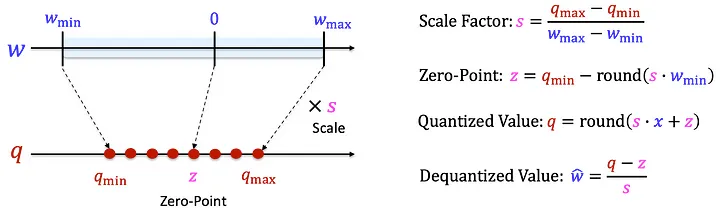

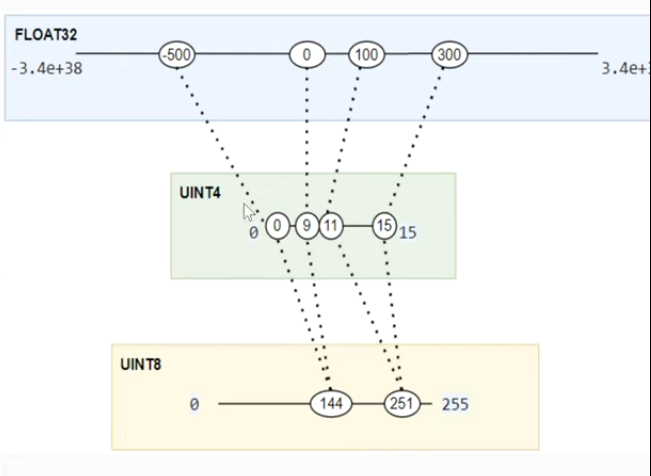

Lets compress FP32 into int8 using linear quantization

In [157]:
# generate random float32 numbers
f32_values = torch.randn(10, dtype=torch.float32)
f32_values

tensor([-0.1364,  0.7313, -2.3206,  1.2477, -0.3559,  1.4981,  2.4020, -1.3576,
         1.3499,  1.1669])

In [158]:
# Downcast to 8 bit
f32_values.to(torch.int8)

tensor([ 0,  0, -2,  1,  0,  1,  2, -1,  1,  1], dtype=torch.int8)

In [159]:
torch.iinfo(torch.int8)

iinfo(min=-128, max=127, dtype=int8)

We can see that the full range of int8 was not utilized when downcasting was performed. Additionally, the values out of range are not converted correctly.

In [160]:
# Quantize to 8 bit
q_dtype = torch.int8

q_min = torch.iinfo(q_dtype).min
q_max = torch.iinfo(q_dtype).max
w_min = min(f32_values)
w_max = max(f32_values)

scale = (q_max-q_min)/(w_max-w_min)
print(scale)

tensor(53.9957)


In [161]:
# If we quantize 0.00, it would be at 'zero point' on the quantized scale
zero_point = torch.round(q_min - scale * w_min)
print(zero_point)

tensor(-3.)


In [162]:
# Quantize the values
quantized_values = torch.round(scale * f32_values + zero_point)
print(quantized_values)

tensor([ -10.,   36., -128.,   64.,  -22.,   78.,  127.,  -76.,   70.,   60.])


In [163]:
print(min(quantized_values), max(quantized_values))

tensor(-128.) tensor(127.)


In [164]:
# Dequantize the values
dequantized_values = (quantized_values - zero_point) / scale
print(dequantized_values)

tensor([-0.1296,  0.7223, -2.3150,  1.2408, -0.3519,  1.5001,  2.4076, -1.3520,
         1.3520,  1.1668])


In [165]:
dequantized_values.tolist()

[-0.1296398937702179,
 0.7222793698310852,
 -2.314997911453247,
 1.240838885307312,
 -0.35187968611717224,
 1.5001187324523926,
 2.407597780227661,
 -1.3519588708877563,
 1.3519588708877563,
 1.1667590141296387]

In [166]:
f32_values.tolist()

[-0.1363796442747116,
 0.7313047647476196,
 -2.320551633834839,
 1.247678279876709,
 -0.35594093799591064,
 1.4981237649917603,
 2.4020442962646484,
 -1.357649326324463,
 1.3499062061309814,
 1.1668704748153687]


references:
1. https://www.youtube.com/watch?v=nn-q5PQCOtQ
2. https://medium.com/@lmpo/understanding-model-quantization-for-llms-1573490d44ad
3. https://blog.gopenai.com/linear-quantization-with-hugging-face-quanto-222a1d29721f



#### Perform Linear Quantization using the Quanto library

https://huggingface.co/docs/transformers/main/en/quantization/quanto

In [1]:
!pip install -q -U optimum-quanto accelerate transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 7.3 MB/s eta 0:00:00


In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer, QuantoConfig

model_id = "facebook/opt-125m"
tokenizer = AutoTokenizer.from_pretrained(model_id)
quantization_config = QuantoConfig(weights="int8")
quantized_model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=quantization_config)

`low_cpu_mem_usage` was None, now default to True since model is quantized.


generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [45]:
text = "### USER: How ae you? ### Assistant:"
tokenizer.add_special_tokens({'pad_token': '<PAD>'})
inputs = tokenizer(text, return_tensors="pt")
outputs = quantized_model.generate(inputs.input_ids,attention_mask=inputs.attention_mask,
                         eos_token_id=tokenizer.eos_token_id,
                         pad_token_id=tokenizer.pad_token_id,
                         max_new_tokens=10,
                         do_sample=False)

print(tokenizer.decode(outputs[0], skip_special_tokens=False))

</s>### USER: How ae you? ### Assistant: How you? ###

### USER:


 Load full model and check size

In [18]:
full_model = AutoModelForCausalLM.from_pretrained(model_id)

In [46]:
outputs = full_model.generate(inputs.input_ids,attention_mask=inputs.attention_mask,
                         eos_token_id=tokenizer.eos_token_id,
                         pad_token_id=tokenizer.pad_token_id,
                         max_new_tokens=10,
                         do_sample=False)

print(tokenizer.decode(outputs[0], skip_special_tokens=False))

</s>### USER: How ae you? ### Assistant: How you? ###

### USER:


In [30]:
def named_module_tensors(module, recurse=False):
    for named_parameter in module.named_parameters(recurse=recurse):
      name, val = named_parameter
      flag = True
      if hasattr(val,"_data") or hasattr(val,"_scale"):
        if hasattr(val,"_data"):
          yield name + "._data", val._data
        if hasattr(val,"_scale"):
          yield name + "._scale", val._scale
      else:
        yield named_parameter

    for named_buffer in module.named_buffers(recurse=recurse):
      yield named_buffer

def dtype_byte_size(dtype):
    """
    Returns the size (in bytes) occupied by one parameter of type `dtype`.
    """
    import re
    if dtype == torch.bool:
        return 1 / 8
    bit_search = re.search(r"[^\d](\d+)$", str(dtype))
    if bit_search is None:
        raise ValueError(f"`dtype` is not a valid dtype: {dtype}.")
    bit_size = int(bit_search.groups()[0])
    return bit_size // 8

def compute_module_sizes(model):
    """
    Compute the size of each submodule of a given model.
    """
    from collections import defaultdict
    module_sizes = defaultdict(int)
    for name, tensor in named_module_tensors(model, recurse=True):
      size = tensor.numel() * dtype_byte_size(tensor.dtype)
      name_parts = name.split(".")
      for idx in range(len(name_parts) + 1):
        module_sizes[".".join(name_parts[:idx])] += size

    return module_sizes

In [25]:
module_sizes = compute_module_sizes(quantized_model)
print(f"The model size is {module_sizes[''] * 1e-9} GB")

The model size is 0.24648556800000002 GB


In [26]:
module_sizes = compute_module_sizes(full_model)
print(f"The model size is {module_sizes[''] * 1e-9} GB")

The model size is 0.500957184 GB
